# Reading the data

In [3]:
# UPLOADING DATA FILE

from google.colab import files

upload = files.upload()

Saving Coal Supply Production by State.csv to Coal Supply Production by State (1).csv


In [4]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv('Coal Supply Production by State.csv')
display(df)

,Rowid,Country,State lgd code,State,Year,Coal category,Coal supplying company name,Coal supplyling sector,Coal type,Coal supplied
0,1,India,1,Jammu And Kashmir,2011,COAL,JKML,OTHER PUBLIC,NON-COOKING,0.023475
1,2,India,1,Jammu And Kashmir,2012,COAL,JKML,OTHER PUBLIC,NON-COOKING,0.019563
2,3,India,1,Jammu And Kashmir,2013,COAL,JKML,OTHER PUBLIC,NON-COOKING,0.018584
3,4,India,1,Jammu And Kashmir,2014,COAL,JKML,OTHER PUBLIC,NON-COOKING,0.018584
4,5,India,1,Jammu And Kashmir,2015,COAL,JKML,OTHER PUBLIC,NON-COOKING,0.012716
...,...,...,...,...,...,...,...,...,...,...
580,581,India,37,Ladakh,2017,COAL,JKML,OTHER PUBLIC,NON-COOKING,0.000219
581,582,India,37,Ladakh,2018,COAL,JKML,OTHER PUBLIC,NON-COOKING,0.000306
582,583,India,37,Ladakh,2019,COAL,JKML,OTHER PUBLIC,NON-COOKING,0.000284
583,584,India,37,Ladakh,2020,COAL,JKML,OTHER PUBLIC,COOKING,0.000000


# Some basic insights into data

In [6]:
df.describe()

,Rowid,State lgd code,Year,Coal supplied
count,585.00000,585.000000,585.000000,585.000000
mean,293.00000,20.815385,2015.613675,11.435398
std,169.01923,6.179404,3.018973,25.153012
min,1.00000,1.000000,2011.000000,0.000000
25%,147.00000,19.000000,2013.000000,0.155000
50%,293.00000,20.000000,2015.000000,1.005000
75%,439.00000,23.000000,2018.000000,9.340000
max,585.00000,37.000000,2020.000000,144.504000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rowid                        585 non-null    int64  
 1   Country                      585 non-null    object 
 2   State lgd code               585 non-null    int64  
 3   State                        585 non-null    object 
 4   Year                         585 non-null    int64  
 5   Coal category                585 non-null    object 
 6   Coal supplying company name  585 non-null    object 
 7   Coal supplyling sector       585 non-null    object 
 8   Coal type                    585 non-null    object 
 9   Coal supplied                585 non-null    float64
dtypes: float64(1), int64(3), object(6)
memory usage: 45.8+ KB


In [8]:
x=df.isna().sum()   #df. isna(). sum() returns the number of missing values in each column.
print(x)

Rowid                          0
Country                        0
State lgd code                 0
State                          0
Year                           0
Coal category                  0
Coal supplying company name    0
Coal supplyling sector         0
Coal type                      0
Coal supplied                  0
dtype: int64


So there are no null entries in our data. 

In [9]:
for col in df.columns.values:
  unique_val = pd.unique(df[col])
  print('Column ' + '"'+ col+'"'  + ' has ' + str(len(unique_val)) + ' unique values')

Column "Rowid" has 585 unique values
Column "Country" has 1 unique values
Column "State lgd code" has 17 unique values
Column "State" has 17 unique values
Column "Year" has 10 unique values
Column "Coal category" has 2 unique values
Column "Coal supplying company name" has 59 unique values
Column "Coal supplyling sector" has 3 unique values
Column "Coal type" has 3 unique values
Column "Coal supplied" has 472 unique values


# Statewise supply

In [10]:
states=df['State'].unique()
print(states)

['Jammu And Kashmir' 'Rajasthan' 'Uttar Pradesh' 'Arunachal Pradesh'
 'Meghalaya' 'Assam' 'West Bengal' 'Jharkhand' 'Odisha' 'Chhattisgarh'
 'Madhya Pradesh' 'Gujarat' 'Maharashtra' 'Andhra Pradesh' 'Tamil Nadu'
 'Telangana' 'Ladakh']


In [11]:
df2 = df.groupby('State').apply(lambda x: x['Coal supplied'].unique().sum())
print(df2)

State
Andhra Pradesh        121.452236
Arunachal Pradesh       0.593000
Assam                   6.919000
Chhattisgarh         1300.051000
Gujarat               123.341000
Jammu And Kashmir       0.112485
Jharkhand            1201.903000
Ladakh                  0.002515
Madhya Pradesh        938.832000
Maharashtra           418.263000
Meghalaya              33.106000
Odisha               1263.194000
Rajasthan              68.609000
Tamil Nadu            248.768000
Telangana             462.879764
Uttar Pradesh         162.835000
West Bengal           279.450000
dtype: float64


In [12]:
df1=df2.sort_values()
print(df1)

State
Ladakh                  0.002515
Jammu And Kashmir       0.112485
Arunachal Pradesh       0.593000
Assam                   6.919000
Meghalaya              33.106000
Rajasthan              68.609000
Andhra Pradesh        121.452236
Gujarat               123.341000
Uttar Pradesh         162.835000
Tamil Nadu            248.768000
West Bengal           279.450000
Maharashtra           418.263000
Telangana             462.879764
Madhya Pradesh        938.832000
Jharkhand            1201.903000
Odisha               1263.194000
Chhattisgarh         1300.051000
dtype: float64


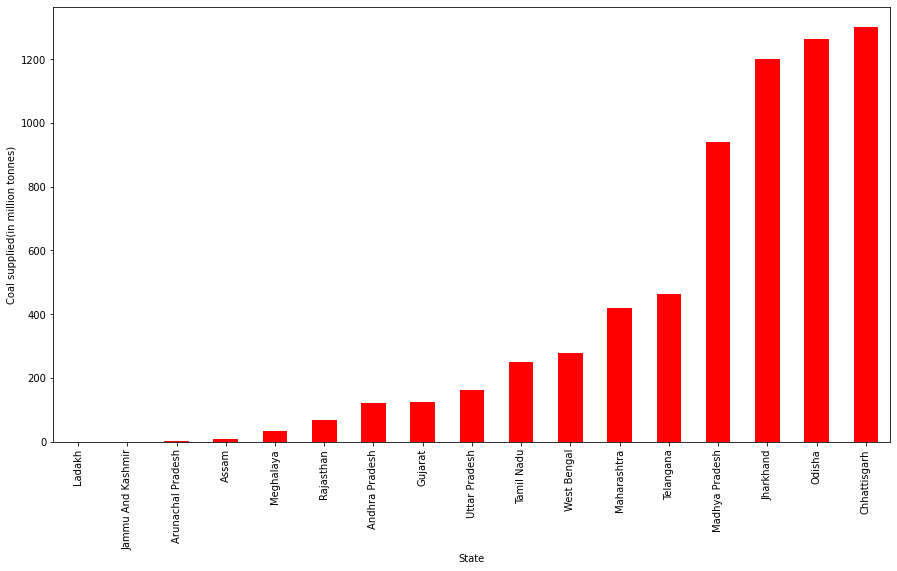

In [13]:
df1.plot(kind='bar', y='Coal supplied',figsize=(15,8),ylabel='Coal supplied(in million tonnes)',color='red')

# Year Wise supply

In [14]:
dfy = df.groupby('Year').apply(lambda x: x['Coal supplied'].unique().sum())
print(dfy)

Year
2011    570.116
2012    581.833
2013    602.262
2014    609.955
2015    659.277
2016    693.077
2017    702.970
2018    721.774
2019    773.001
2020    772.994
dtype: float64


Text(0, 0.5, 'Coal reserved quantity (in million tonnes)')

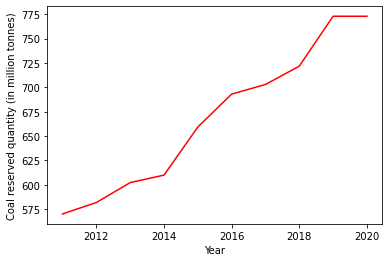

In [15]:
plt.plot(dfy,'red')
plt.xlabel("Year")
plt.ylabel("Coal reserved quantity (in million tonnes)")

# Typewise supply

In [17]:
dft = df.groupby('Coal category').apply(lambda x: x['Coal supplied'].unique().sum())
print(dft)

Coal category
COAL       6175.481
LIGNITE     440.718
dtype: float64


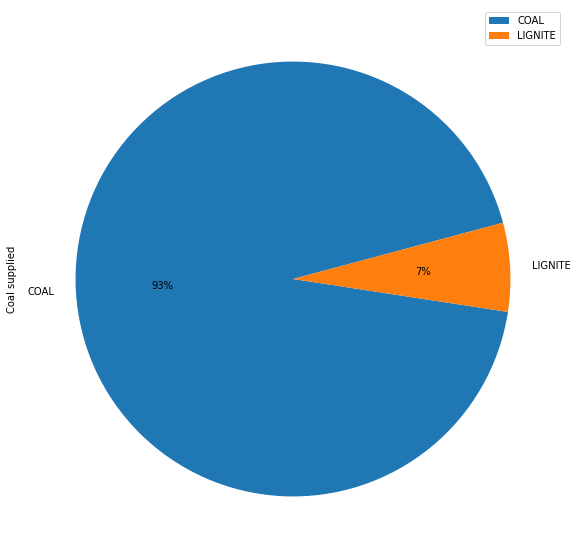

In [18]:
df.groupby(['Coal category']).sum().plot(kind='pie', y='Coal supplied',autopct='%1.0f%%',figsize=(10,10),xlabel="Type of coal ",startangle=15)

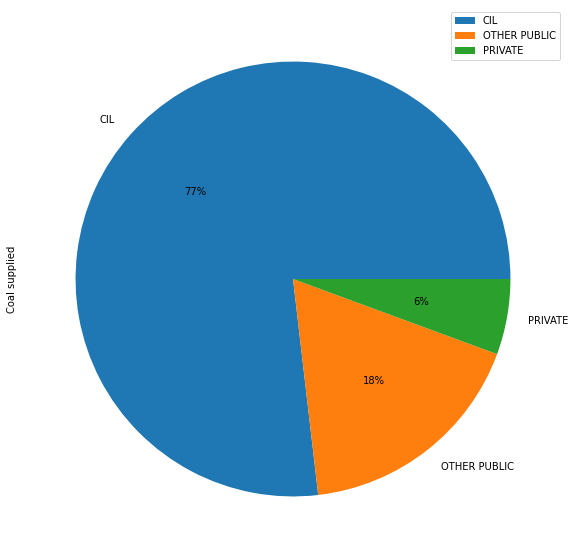

In [19]:
df.groupby(['Coal supplyling sector']).sum().plot(kind='pie', y='Coal supplied',autopct='%1.0f%%',figsize=(10,10),xlabel="Depth of reserve (in meters) ")

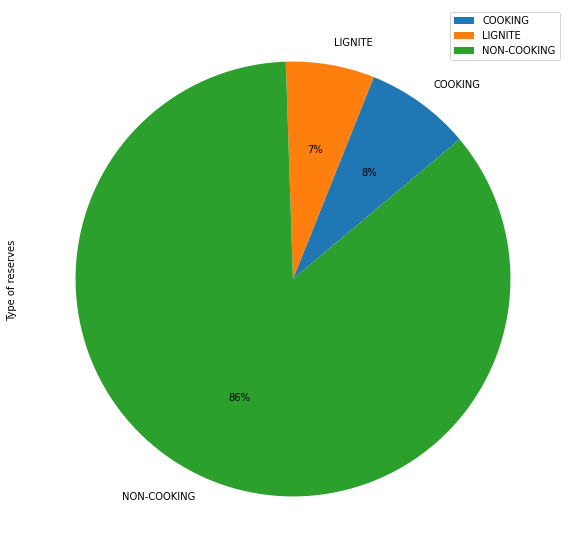

In [23]:
df.groupby(['Coal type']).sum().plot(kind='pie', y='Coal supplied',autopct='%1.0f%%',figsize=(10,10),ylabel="Type of reserves ",startangle=40)

# Top 5 coal supplying companies in india

In [24]:
df5 = df.groupby('Coal supplying company name').apply(lambda x: x['Coal supplied'].unique().sum()).sort_values(ascending=False)
print(df5)

Coal supplying company name
SECL           1327.835
MCL            1247.790
NCL             810.696
SCCL            581.914
CCL             576.649
WCL             457.418
ECL             396.112
BCCL            321.832
NLC             254.319
SPL             100.051
GMDCL            90.915
TISCO/TSL        66.259
BLMCL            45.104
RRVUNL           42.742
MEG              33.106
PANEM/PSEB       32.570
GIPCL            30.634
JPL              23.412
NTPC             21.141
HIL              18.990
JSPL             17.986
ICML             16.003
WBPDCL           15.078
KECML/KEMTA      11.950
RSMML            11.871
CESC              9.309
IISCO/SAIL        7.185
NEC               6.919
VSLPPL            6.083
DVC EMTA          5.542
BECML             5.474
SEML              4.536
MIL/MIEL          4.517
JPVL              2.800
UML               2.763
TSPGCL            2.418
WBMDTCL           2.116
JNL               2.035
BALCO             1.967
GHCL              1.792
TUML        

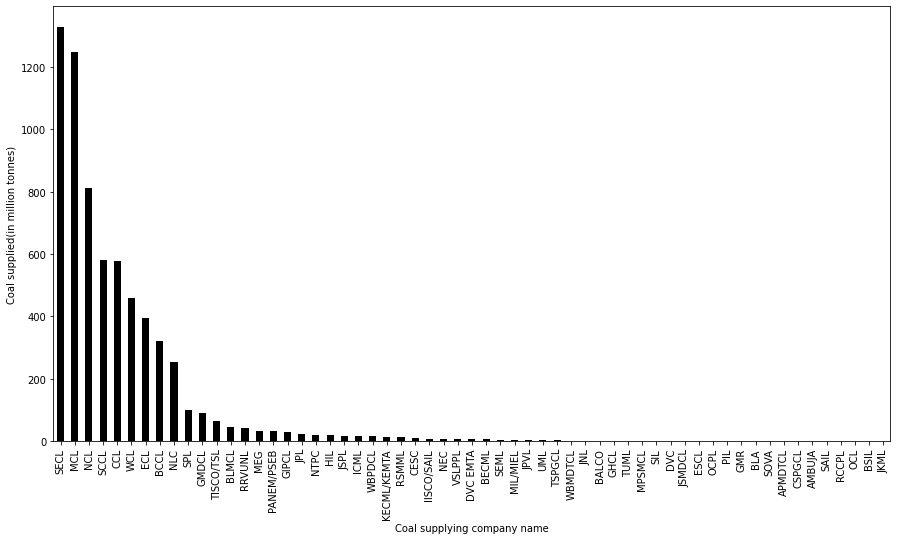

In [25]:
df5.plot(kind='bar', y='Coal supplied',figsize=(15,8),ylabel='Coal supplied(in million tonnes)',color='black')

SECL, MCL, NCL, SCCL and CCL are top 5 coal supply companies in india over past 10 years.